In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_analysis_codes.tools import PlottingTools as RPlot
from data_analysis_codes.tools import ReadingTools as RRead
from data_analysis_codes.tools import Cstyle
from data_analysis_codes.tools import LinData
plt.style.use(Cstyle.style1)
import time
import h5py
from matplotlib import gridspec
from data_analysis_codes.tools import ODUDLoc
import pandas as pd
from data_analysis_codes.tools import TAradius
from data_analysis_codes.tools import GetVars_Plot2d as GVar

In [2]:
sim32 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N32_LCDM')
sim64 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N64_LCDM')
sim128 = RRead.read_parameters('pflrw_d3e2_L1821_t1_N128_LCDM')

In [3]:
Lin = LinData.LinData_Class(sim32)
f = pd.read_table(sim32['HorSpath']+sim32['simname']+'/TA_radius.csv', delimiter=',')
rcom32 = np.array([f['R_T0_P0_COM'],f['R_T45_P0_COM'], f['R_T45_P45_COM']])
rprop32 = np.array([f['R_T0_P0_PROP'],f['R_T45_P0_PROP'], f['R_T45_P45_PROP']])
an32 = np.array([Lin.temp_from_temp('an', 'it', i) for i in f['it']])

Lin = LinData.LinData_Class(sim64)
f = pd.read_table(sim64['HorSpath']+sim64['simname']+'/TA_radius.csv', delimiter=',')
rcom64 = np.array([f['R_T0_P0_COM'],f['R_T45_P0_COM'], f['R_T45_P45_COM']])
rprop64 = np.array([f['R_T0_P0_PROP'],f['R_T45_P0_PROP'], f['R_T45_P45_PROP']])
an64 = np.array([Lin.temp_from_temp('an', 'it', i) for i in f['it']])

Lin = LinData.LinData_Class(sim128)
f = pd.read_table(sim128['HorSpath']+sim128['simname']+'/TA_radius.csv', delimiter=',')
rcom128 = np.array([f['R_T0_P0_COM'],f['R_T45_P0_COM'], f['R_T45_P45_COM']])
rprop128 = np.array([f['R_T0_P0_PROP'],f['R_T45_P0_PROP'], f['R_T45_P45_PROP']])
an128 = np.array([Lin.temp_from_temp('an', 'it', i) for i in f['it']])

 read time file
 read time file
 read time file


In [4]:
def interpolate(f):
    f_save = [f[0]]
    for i in range(len(f)-1):
        f_save += [np.average([f[i], f[i+1]]), f[i+1]]
    return np.array(f_save)

def extrapolate(f):
    return np.append(f, f[-1]+f[-1]-f[-2])

def get_error(f32, f64, f128):
    f32 = interpolate(interpolate(f32))
    f64 = interpolate(f64)
    while len(f32)<len(f128):
        f32 = extrapolate(f32)
    while len(f64)<len(f128):
        f64 = extrapolate(f64)
    c = abs(f32-f64)/abs(f64-f128)
    err = abs((f64-f128)/(c-1))
    for ic in range(len(c)):
        if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
            err[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
    return err

In [5]:
ecom_vert = get_error(rcom32[0], rcom64[0], rcom128[0])
ecom_edge = get_error(rcom32[1], rcom64[1], rcom128[1])
ecom_face = get_error(rcom32[2], rcom64[2], rcom128[2])

eprop_vert = get_error(rprop32[0], rprop64[0], rprop128[0])
eprop_edge = get_error(rprop32[1], rprop64[1], rprop128[1])
eprop_face = get_error(rprop32[2], rprop64[2], rprop128[2])

<ipython-input-4-7ca9ba8edc4a>:17: RuntimeWarning: divide by zero encountered in true_divide
  c = abs(f32-f64)/abs(f64-f128)
<ipython-input-4-7ca9ba8edc4a>:17: RuntimeWarning: invalid value encountered in true_divide
  c = abs(f32-f64)/abs(f64-f128)


In [6]:
L = sim128['Lx']

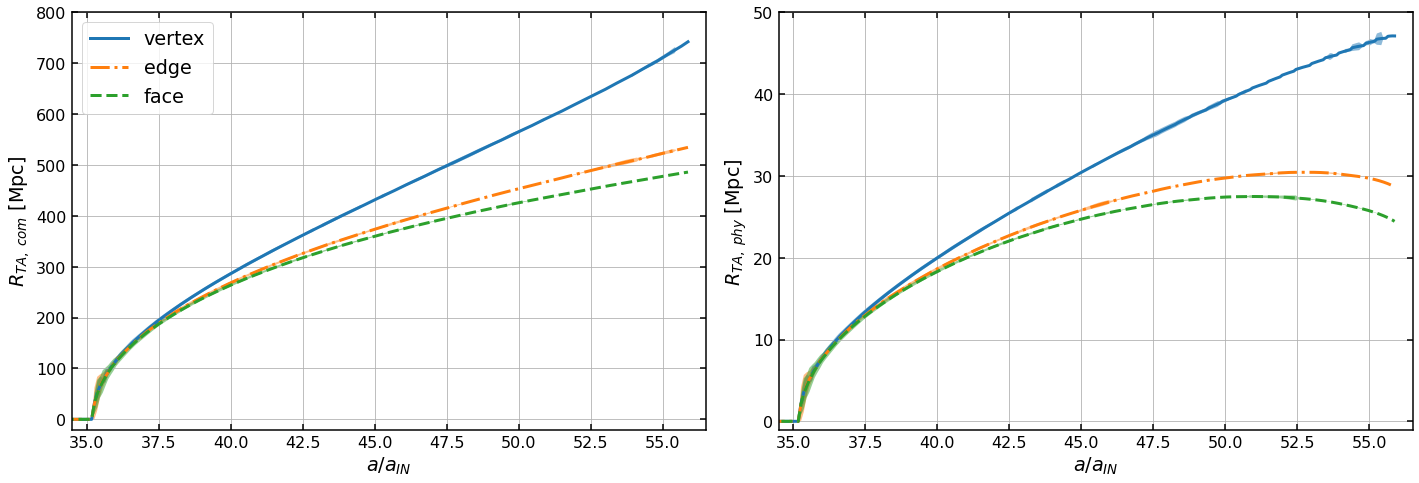

In [11]:
L = 1
alphafac = 0.5
plt.figure(figsize=(20, 7))
plt.subplot(121)
plt.plot(an128, L*rcom128[0], '-', label='vertex')
plt.fill_between(an128, L*(rcom128[0]-ecom_vert), L*(rcom128[0]+ecom_vert), alpha=alphafac)
plt.plot(an128, L*rcom128[1], '-.', label='edge')
plt.fill_between(an128, L*(rcom128[1]-ecom_edge), L*(rcom128[1]+ecom_edge), alpha=alphafac)
plt.plot(an128, L*rcom128[2], '--', label='face')
plt.fill_between(an128, L*(rcom128[2]-ecom_face), L*(rcom128[2]+ecom_face), alpha=alphafac)
plt.grid()
plt.legend()
plt.ylabel(r'$R_{TA,\;com}$ [Mpc]')
plt.xlabel(r'$a/a_{IN}$')
plt.xlim(34.5, 56.5)
plt.ylim(-20*L, L*800)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

plt.subplot(122)
plt.plot(an128, L*rprop128[0], '-')
plt.fill_between(an128, L*(rprop128[0]-eprop_vert), L*(rprop128[0]+eprop_vert), alpha=alphafac)
plt.plot(an128, L*rprop128[1], '-.')
plt.fill_between(an128, L*(rprop128[1]-eprop_edge), L*(rprop128[1]+eprop_edge), alpha=alphafac)
plt.plot(an128, L*rprop128[2], '--')
plt.fill_between(an128, L*(rprop128[2]-eprop_face), L*(rprop128[2]+eprop_face), alpha=alphafac)
plt.grid()
plt.ylabel(r'$R_{TA,\;phy}$ [Mpc]')
plt.xlabel(r'$a/a_{IN}$')
plt.xlim(34.5, 56.5)
plt.ylim(-1*L, L*50)
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
plt.tight_layout()
plt.savefig('/home/robynm/simulations/'+sim128['simname']+'/plots/TA_1d.pdf')

<ipython-input-22-d92e9652c63a>:11: RuntimeWarning: divide by zero encountered in true_divide
  c = abs(f32-f64)/abs(f64-f128)
<ipython-input-22-d92e9652c63a>:11: RuntimeWarning: invalid value encountered in true_divide
  c = abs(f32-f64)/abs(f64-f128)


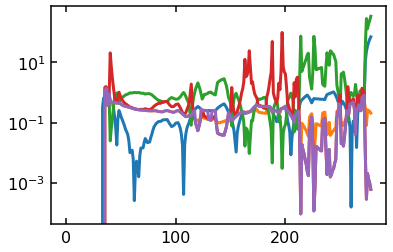

In [22]:
f32 = interpolate(interpolate(rprop32[0]))
f64 = interpolate(rprop64[0])
f128 = rprop128[0]
while len(f32)<len(f128):
    f32 = extrapolate(f32)
while len(f64)<len(f128):
    f64 = extrapolate(f64)
    
plt.semilogy(abs(f32-f64))
plt.semilogy(abs(f64-f128))
c = abs(f32-f64)/abs(f64-f128)
plt.semilogy(abs(c-1))
err = abs((f64-f128)/(c-1))
plt.semilogy(err)
emax = err
for ic in range(len(c)):
    if err[ic]>abs(f32[ic]-f64[ic]) or err[ic]>abs(f64[ic]-f128[ic]):
        emax[ic] = np.max([abs(f32[ic]-f64[ic]), abs(f64[ic]-f128[ic])])
plt.semilogy(emax)